<a href="https://colab.research.google.com/github/popelucha/STEAM/blob/main/STEAM_modely_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozpoznávání pojmenovaných entit (NER)

## S Huggingface

Na [huggingface.co](https://huggingface.co) je obrovské úložiště datových sad, korpusů a modelů. Vyzkoušíme některé předtrénované modely pro NER.

## Hledání na Huggingface

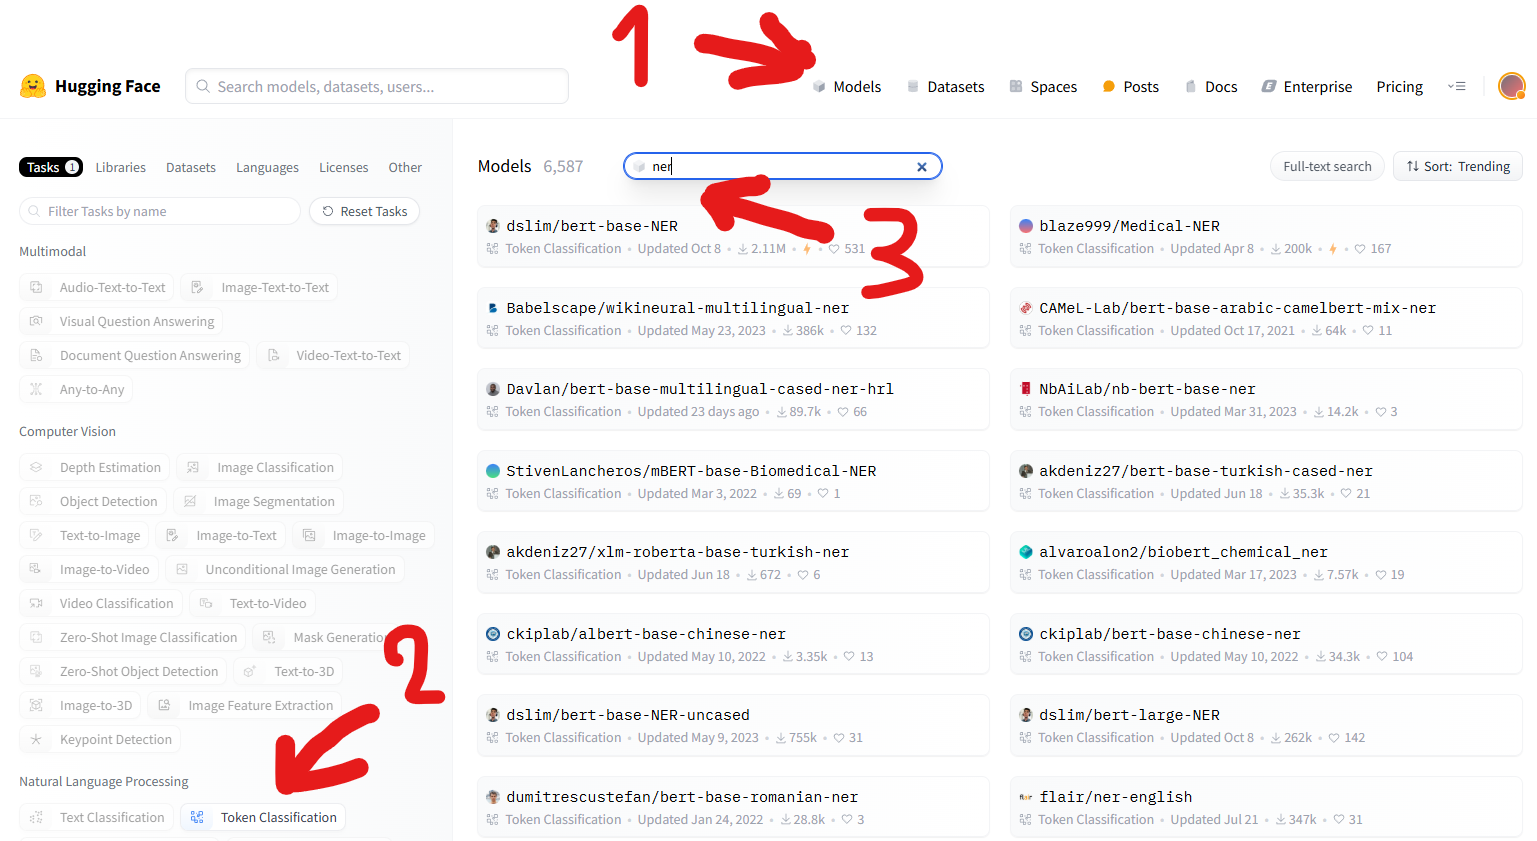

1. Vyberte modely (Models 1)
1. Vyberte úlohu: NER říká o každém tokenu, zda je, nebo není pojmenovaná entita. Je to tedy klasifikace tokenů (Token classification 2)
1. Můžete hledat fulltexte. Lidé často pojmenují model tak, aby ho někdo jiný mohl najít, třeba něconěco-ner.

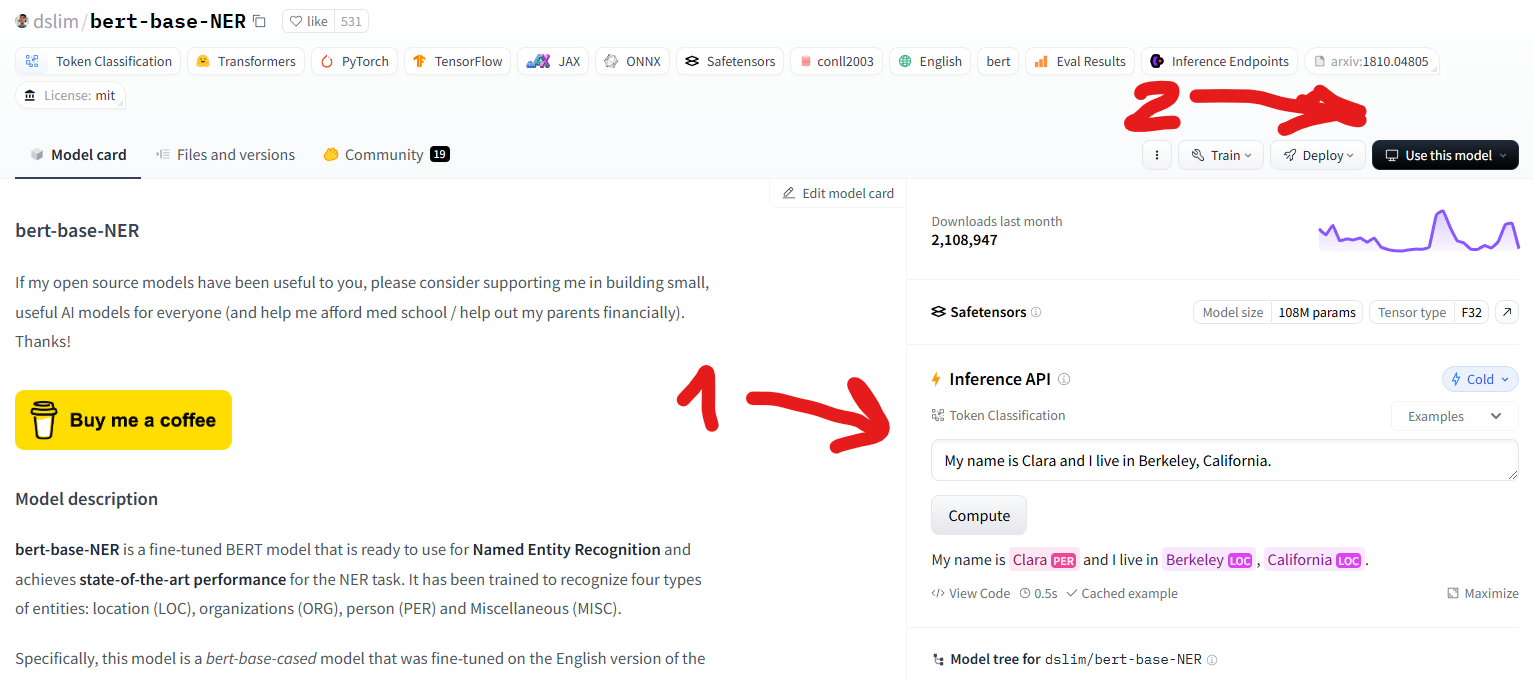
U vybraného modelu (v tomto případě bert-base-NER) můžeme někdy rovnou vyzkoušet, co dělá (Inference API 1).
Pokud je to to, co chceme, jednoduše zkopírujeme kód pod tlačítkem Use this model (2) do svého programu.

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("token-classification", model="dslim/bert-base-NER")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [2]:
pipe("My name is Clara and I live in Berkeley, California.")

[{'entity': 'B-PER',
  'score': 0.99641764,
  'index': 4,
  'word': 'Clara',
  'start': 11,
  'end': 16},
 {'entity': 'B-LOC',
  'score': 0.996198,
  'index': 9,
  'word': 'Berkeley',
  'start': 31,
  'end': 39},
 {'entity': 'B-LOC',
  'score': 0.9990196,
  'index': 11,
  'word': 'California',
  'start': 41,
  'end': 51}]

# A co čeština?

Mezi dobré české modely patří Czert (čert), který nikdy nespí a umí vyřešit i jiné úlohy.
Czert, který použijeme, je adaptovaný na úlohu NER pomocí korpusu pojmenovaných entit CNEC.

In [5]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe_cs = pipeline("token-classification", model="stulcrad/CNEC_2_0_ext_Czert-B-base-cased")

In [6]:
pipe_cs("Jmenuju se Klára a žiju ve Vídni na Vysočině.")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity': 'B-P',
  'score': 0.99868435,
  'index': 4,
  'word': 'Klára',
  'start': 11,
  'end': 16},
 {'entity': 'B-G',
  'score': 0.99891734,
  'index': 9,
  'word': 'Vídni',
  'start': 27,
  'end': 32},
 {'entity': 'B-G',
  'score': 0.9991881,
  'index': 11,
  'word': 'Vysočině',
  'start': 36,
  'end': 44}]

# Zkoušíme věci rozbít

Zkuste:
* co se stane, když přestaneme psát spisovně
* co se stane, když přestaneme používat velká písmena na začátku jmen
* co se stane, když budeme používat velká a malá písmena úplně nÁHoDNě
* použít český model na angličtinu
* použít anglický model na češtinu
* použít český model na slovenštinu
* cokoli dalšího, co vás napadne